# 1. Introduction

Amsterdam is the capital and most popular city of the Netherlands. It is colloquially referred to as the "Venice of the North", attributed by the large number of canals which form a UNESCO World Heritage Site(https://en.wikipedia.org/wiki/Amsterdam). Amsterdam is the heaven of art because of its high-density distribution of museums and art galleries. It has large amount of collections of Vincent Willem van Gogh and Rembrandt Harmenszoon van Rijn. Amsterdam is also famous of its open culture to sex and cannabis. According to https://www.dw.com/en/how-amsterdam-is-fighting-mass-tourism/a-47806959, there were 19 million tourists visiting Amsterdam in 2019 which brings the high demands of hotels.  

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences (https://en.wikipedia.org/wiki/Airbnb). More and more people choose to stay in a local house when they are travelling. The prices of the houses vary a lot depending on the location, the size, the service or the surroundings of the houses.

So, in this project, I would like to use the data science techniques to solve the following question:

**Which factors of the property could affect the rental price on Airbnb?**

Which factors of the property could affect the rental price on Airbnb?
The answer of this question can be useful for people from Amsterdam who wants to start renting their properties on Airbnb, or tourists who are going to visit Amsterdam and want to estimate the cost of accommodation.

In [79]:
import folium # map rendering library
import requests # library to handle requests
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# 2. Data

The data we will use are:
* The data of Airbnb properties in Amsterdam
* The venue information provided by Foursquare API
* The coordinate of Amsterdam center provided by Google Map

In [80]:
# The coordinates of Amsterdam center
latitude = 52.372952
longitude = 4.906080

The Airbnb data of Amsterdam was retrieved from Kaggle (https://www.kaggle.com/erikbruin/airbnb-amsterdam).The dataset includes the following files:
* calendar.csv: The calendar has 365 records for each listing. It specifies the whether the listing is available on a particular day (365 days ahead), and the price on that day.
* listings.csv: A listing is basically an advertisement. This file holds the most useful variables that can be used visualizations.
* listings_details.csv: This file holds the same variables as the listing file plus 80 additional variables.
* neighbourhood.csv: Simple file with the Dutch names of the neighbouhoods
* reviews.csv: This is a simple file that can be used to count the number of reviews by listing (for a specific period).
* reviews_details.csv: This file holds the full details of all reviews, and can also be used for instance for text mining.
* neighbourhoods.geojson: This is the shape file that can be used in conjunction with interactive maps (such as Leaflet for R of the Python folium package).

## 2.1 Airbnb Amsterdam data

In [81]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airbnb-amsterdam/reviews_details.csv
/kaggle/input/airbnb-amsterdam/listings.csv
/kaggle/input/airbnb-amsterdam/neighbourhoods.geojson
/kaggle/input/airbnb-amsterdam/calendar.csv
/kaggle/input/airbnb-amsterdam/neighbourhoods.csv
/kaggle/input/airbnb-amsterdam/listings_details.csv
/kaggle/input/airbnb-amsterdam/reviews.csv


We use the data from listings_details.csv to describ the airbnb properties.

In [82]:
ab_data = pd.read_csv('/kaggle/input/airbnb-amsterdam/listings_details.csv')
print(ab_data.shape)
ab_data.head()

(20030, 96)


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


For each property in the dataset, it has following information:

In [83]:
ab_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

## 2.2 Amsterdam Neighbourhoods Coordinates

We use neighbourhoods.geojson to get the longitude and latitude of the center of each neighbourhood.

In [84]:
import geopandas as gpd
geo_ams = gpd.read_file('/kaggle/input/airbnb-amsterdam/neighbourhoods.geojson')

In [85]:
geo_ams["longitude"] = geo_ams.centroid.x
geo_ams["latitude"] = geo_ams.centroid.y
geo_ams.drop('neighbourhood_group', axis=1, inplace=True)
geo_ams

,neighbourhood,geometry,longitude,latitude
0,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",4.977317,52.320279
1,Noord-Oost,"MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5...",5.003523,52.398339
2,Noord-West,"MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4...",4.894589,52.415306
3,Oud-Noord,"MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4...",4.910489,52.394068
4,IJburg - Zeeburgereiland,"MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5...",4.998377,52.360899
5,Centrum-West,"MULTIPOLYGON Z (((4.90640 52.38004 42.97078, 4...",4.889084,52.376426
6,Oostelijk Havengebied - Indische Buurt,"MULTIPOLYGON Z (((4.96131 52.35913 43.00823, 4...",4.941492,52.371412
7,Centrum-Oost,"MULTIPOLYGON Z (((4.93297 52.37041 42.98810, 4...",4.908287,52.367753
8,Oud-Oost,"MULTIPOLYGON Z (((4.93743 52.35774 43.01043, 4...",4.919954,52.357795
9,Watergraafsmeer,"MULTIPOLYGON Z (((4.96971 52.35636 43.01317, 4...",4.931061,52.342719


## 2.3 Foursquare data

We will use the FourSquare API (www.foursquare.com) to explore the venues of each neighbourhood in Amsterdam. Given a pair of coordinates, the Foursquare explore function can be used to retrieve the venues nearby. The categories and the number of venues can describe how conveninent living in a place.

# 3. Metrology

In this section, we will explore the data we use. Data cleaning and feature engineering methods will be used to prepare the data that is ready to fit into the model.

## 3.1 Airbnb data cleaning

There are 96 columns in the airbnb data. But there are columns not valuable for our analysis such as listing_url, scrape_id. So, we can firstly filter some columns that are not describing the property.

In [86]:
ab_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [87]:
columns = ['id', 'name',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'price', 'cleaning_fee', 'guests_included', 'extra_people', 
       'minimum_nights', 'maximum_nights', 
       'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
       'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy']

In [88]:
data_columns = ab_data[columns]
print(data_columns.shape)

(20030, 35)


Now, there are 35 columns left.

### 3.1.1 Drop the unavaliable samples

We would like to focus on the properties that are available regularly. So, we can remove remove the properties are not availiable in the past recent months.

In [89]:
data_columns = data_columns[data_columns['has_availability'] == 't']
data_columns.shape

(20030, 35)

In [90]:
data_columns = data_columns[data_columns['availability_30'] != 0]
data_columns = data_columns[data_columns['availability_60'] != 0]
data_columns = data_columns[data_columns['availability_90'] != 0]
data_columns = data_columns[data_columns['availability_365'] != 0]
data_columns.shape

(8521, 35)

In [91]:
data_columns.drop(['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365'], axis=1, inplace=True)
data_columns.shape

(8521, 30)

### 3.1.2 Drop the samples missing information

Also, we would like to focus on the valid property only which means the property has a valid price and reviews from previous guests to verify the authenticity.

In [92]:
data_columns = data_columns[data_columns['price'] != 0]
data_columns = data_columns[data_columns['number_of_reviews'] != 0]
data_columns = data_columns[data_columns['review_scores_rating'].notnull()]
data_columns.shape

(7414, 30)

### 3.1.3 Examine the missing values

Then, let's deal with the missing values in the data.

In [93]:
def examine_missing_values(data):
    data_na= data.isnull().sum().sort_values(ascending=False)
    data_na_percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    missing_data = pd.concat([data_na, data_na_percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [94]:
missing_data = examine_missing_values(data_columns)
missing_data.head(20)

,Total,Percent
square_feet,7203,97.154033
cleaning_fee,965,13.015916
bathrooms,6,0.080928
beds,3,0.040464
bedrooms,3,0.040464
review_scores_value,2,0.026976
review_scores_location,2,0.026976
review_scores_communication,2,0.026976
review_scores_checkin,2,0.026976
room_type,0,0.000000


### Drop the feature having too many missing values

More than 97% of properties do not have the square feet recorded. So, we remove the square_feet from the data.

In [95]:
data_columns.drop(['square_feet'], axis=1, inplace=True)
data_columns.shape

(7414, 29)

### Fill the missing sub-reviews by corresponding review_scores_rating

If a review score for a sub-catogery is missing, we fill it by its average review score which is review_score_rating.

In [96]:
data_columns['review_scores_value'].fillna(data_columns['review_scores_rating'], inplace=True)
data_columns['review_scores_location'].fillna(data_columns['review_scores_rating'], inplace=True)
data_columns['review_scores_communication'].fillna(data_columns['review_scores_rating'], inplace=True)
data_columns['review_scores_checkin'].fillna(data_columns['review_scores_rating'], inplace=True)

### Fill the missing bathrooms, bedrooms, beds by 0

If the values of bathrooms, bedrooms, beds are missing, we can understand there is no bathroom, bedroom, bed in this property. So, we fill them by 0.

In [97]:
data_columns['bathrooms'].fillna(0, inplace=True)
data_columns['bedrooms'].fillna(0, inplace=True)
data_columns['beds'].fillna(0, inplace=True)

### Fill the missing cleaning fee by mode

We fill the missing cleaning fee by mode.

In [98]:
data_columns['cleaning_fee'].fillna(data_columns['cleaning_fee'].mode()[0], inplace=True)

### Examine missing values again

In [99]:
missing_data = examine_missing_values(data_columns)
missing_data.head(20)

,Total,Percent
cancellation_policy,0,0.0
cleaning_fee,0,0.0
name,0,0.0
neighbourhood_cleansed,0,0.0
latitude,0,0.0
longitude,0,0.0
property_type,0,0.0
room_type,0,0.0
accommodates,0,0.0
bathrooms,0,0.0


Now, there is no more missing value in our dataset.

In [100]:
data_columns.shape

(7414, 29)

### 3.1.4 Convert the type of some features

In [101]:
numeric_features = list(data_columns.dtypes[data_columns.dtypes != 'object'].index)
numeric_features.remove('id')
numeric_features.remove('latitude')
numeric_features.remove('longitude')
numeric_features

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [102]:
category_features = list(data_columns.dtypes[data_columns.dtypes == 'object'].index)
category_features.remove('name')
category_features

['neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'price',
 'cleaning_fee',
 'extra_people',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy']

We can see there are some features related to price that should be numerical rather than categorical, such as price, cleaning_fee, extra_people. That is because the money data is recorded as a string in the format of '50$'. So we convert these money-related features to numbers.

In [103]:
data_columns['price'] = data_columns['price'].apply(lambda x:x.lstrip('$'))
data_columns['price'] = data_columns['price'].apply(lambda x:x.replace(',',''))
data_columns['price'] = data_columns['price'].astype('float')
data_columns['cleaning_fee'] = data_columns['cleaning_fee'].apply(lambda x:x.lstrip('$'))
data_columns['cleaning_fee'] = data_columns['cleaning_fee'].astype('float')
data_columns['extra_people'] = data_columns['extra_people'].apply(lambda x:x.lstrip('$'))
data_columns['extra_people'] = data_columns['extra_people'].astype('float')

We then add cleaning_fee and exra_people to numeric features list. Since price is our predicting value, we won't put it in the feature list.

In [104]:
numeric_features.extend(['cleaning_fee', 'extra_people'])
numeric_features

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'cleaning_fee',
 'extra_people']

Also, excluding the above features from the category features list.

In [105]:
category_features.remove('price')
category_features.remove('cleaning_fee')
category_features.remove('extra_people')

We rename the neighbourhood_cleansed to neighbourhood for better understanding.

In [106]:
data_columns.columns = ['neighbourhood' if x=='neighbourhood_cleansed' else x for x in data_columns.columns]
features = data_columns
print(features.shape)
features.head()

(7414, 29)


,id,name,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,2,1.5,1.0,...,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period
3,25428,Lovely apt in City Centre (Jordaan),Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,3,1.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period
4,27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,52.386727,4.892078,Houseboat,Private room,2,1.0,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period
5,28658,Cosy guest room near city centre -1,Bos en Lommer,52.375342,4.857289,Apartment,Private room,2,1.0,1.0,...,93.0,9.0,10.0,10.0,9.0,9.0,9.0,f,f,moderate
6,28871,Comfortable double room,Centrum-West,52.367187,4.890918,Apartment,Private room,2,0.0,1.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate


In [107]:
category_features.remove('neighbourhood_cleansed')
category_features.append('neighbourhood')
category_features

['property_type',
 'room_type',
 'bed_type',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'neighbourhood']

### 3.1.5 Correct highly skewed numerical features

The skewed distribution has the following disadvantages:
* Highly skewed distributions are difficult to examine because most of the observations are confined to a small part of the range of the data.
* Outlying values in the direction of the skew are brought in toward the main body of the data when the distribution is made more symmetric. 

For the features with high skewness, I uesed box-cox transformation to correct the non-normal distribution while maintaining the information.

In [108]:
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p
skew_features = features[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

### 3.1.6 Get dummy categorical features

We use one hot encoder to encode the categorical features.

In [109]:
def one_hot_encode(data, columns):
    onehot = pd.get_dummies(data[columns])
    onehot['id'] = data['id']
    # move id column to the first column
    fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
    onehot = onehot[fixed_columns]
    return onehot

In [110]:
features_onehot = one_hot_encode(features, category_features)
features_onehot.head()

,id,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Casa particular (Cuba),...,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid
0,2818,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,25428,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27886,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,28658,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,28871,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.2 Examine the distribution of price

Let's examine the normality of the price distribution.

In [111]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())
    
    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()

Checking the statistical distribution of prices
count    7414.000000
mean      162.796601
std       180.272825
min         0.000000
25%        99.000000
50%       135.000000
75%       190.000000
max      8500.000000
Name: price, dtype: float64
Fitting the prices into normal distribution

 mu = 162.80 and sigma = 180.26



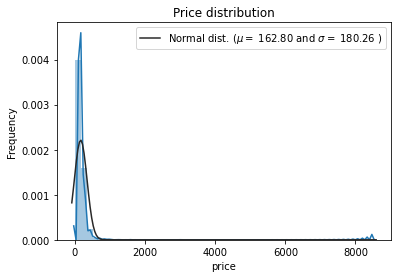

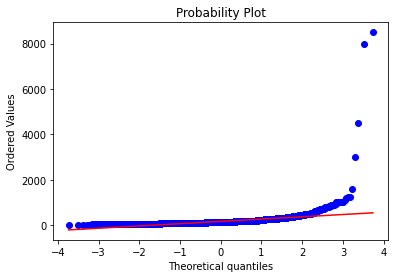

In [112]:
check_dist(features['price'])

We can the distribution of price is highly skewed. Also, there are several outlier when the price is above 2000. We firstly remove outliers and then correct the distribution the price by log function.

In [113]:
features = features[features['price']<2000]

In [114]:
def correct_dist(price):
    price = np.log1p(price)

    #Check the new distribution 
    sns.distplot(price , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()
    return price


 mu = 4.93 and sigma = 0.52



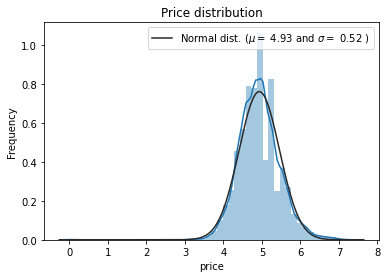

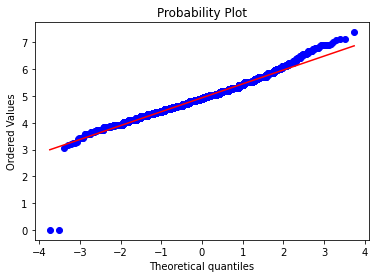

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
features['corrected_price'] = correct_dist(features['price'])

## 3.3 Neighbourhoods Exploration
Firstly, let's see the number of properities of neighbourhoods.

In [116]:
neighbourhood_count = pd.DataFrame({'neighbourhood': features['neighbourhood'].value_counts().index, 
                                    'count': features['neighbourhood'].value_counts().values})
neighbourhood_count.head()

,neighbourhood,count
0,De Baarsjes - Oud-West,1202
1,Centrum-West,1134
2,De Pijp - Rivierenbuurt,843
3,Centrum-Oost,729
4,Zuid,500


In [117]:
map_ams_count = folium.Map(location=[latitude, longitude], zoom_start=12)
map_ams_count.choropleth(
    geo_data=r'/kaggle/input/airbnb-amsterdam/neighbourhoods.geojson',
    data=neighbourhood_count,
    columns=['neighbourhood', 'count'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='The number of properites',
    reset=True
)
map_ams_count

/opt/conda/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


The neighbourhood closer to the center, the more properites it has. The top 3 neighbourhoods are Oud-West, Centrum-West, De Pijp - Rivierenbuurt, Centrum-Oost, Zuid.

Then, let's see how the median of the prices distributied in different neighbourhoods.

In [118]:
neighbourhood_price = features.groupby('neighbourhood').median()['price']
neighbourhood_price = pd.DataFrame({'neighbourhood':neighbourhood_price.index, 'price': neighbourhood_price.T.values})
neighbourhood_price.sort_values('price', ascending=False, inplace=True)
neighbourhood_price.head()

,neighbourhood,price
4,Centrum-Oost,160.0
5,Centrum-West,155.5
21,Zuid,140.0
8,De Pijp - Rivierenbuurt,140.0
7,De Baarsjes - Oud-West,139.0


In [119]:
map_ams_price = folium.Map(location=[latitude, longitude], zoom_start=12)
map_ams_price.choropleth(
    geo_data=r'/kaggle/input/airbnb-amsterdam/neighbourhoods.geojson',
    data=neighbourhood_price,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='The average_price',
    reset=True
)
map_ams_price

Same, the neighbourhood closer to the center, the higher median of the prices it has. Top 2 neighbourhoods are Centrum-Oost, Centrum-West.

## 3.4 Venues Exploration

Foursquare requires client id, client secret and version for accessing their API.

In [120]:
CLIENT_ID = 'H201PLIGMNTAP5ZKN2DZK1QSDVTSZNLH4SGVA0VBPFO00MFT' # your Foursquare ID
CLIENT_SECRET = 'JAPGNRKSTAJEQUKPATJJCNFETSEJQBAQRPDODZDNU1CN1MLP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H201PLIGMNTAP5ZKN2DZK1QSDVTSZNLH4SGVA0VBPFO00MFT
CLIENT_SECRET:JAPGNRKSTAJEQUKPATJJCNFETSEJQBAQRPDODZDNU1CN1MLP


Each venue provided by Foursquare belongs to a category and a sub_category, and each category has an unique ID (https://developer.foursquare.com/docs/build-with-foursquare/categories/).   
Foursquare has main 10 categories: 
* 'Arts & Entertainment': '4d4b7104d754a06370d81259', 
* 'College & University': '4d4b7105d754a06372d81259', 
* 'Event': '4d4b7105d754a06373d81259', 
* 'Food': '4d4b7105d754a06374d81259',
* 'Nightlife Spot': '4d4b7105d754a06376d81259',
* 'Outdoors & Recreation': '4d4b7105d754a06377d81259',
* 'Professional & Other Places': '4d4b7105d754a06375d81259',
* 'Residence': '4e67e38e036454776db1fb3a',
* 'Shop & Service': '4d4b7105d754a06378d81259',
* 'Travel & Transport': '4d4b7105d754a06379d81259'}


The sub_category gives more detailed description. For example, the type of restaurant, such as Chinese restaurant.  

In our case, the 10 main categories would be enough for us to understand the type of venues nearby. The more detailed categories are not very helpful for us to define a location. For example, we can say a place is suitable for people who has requirement for food if there are more than 20 restaurants nearby. It is not necessary to know whether there it's a Chinese restaurant or Italy restaurant.

There are three categories in the 10 main categories usually won't affect the choices of people when they are in travel: College \& University, Professional \& Other Places, Residence. So we won't consider the venues belonging to these there categories.

In [121]:
# categories = {'Arts & Entertainment': '4d4b7104d754a06370d81259', 
#                   'College & University': '4d4b7105d754a06372d81259', 
#                   'Event': '4d4b7105d754a06373d81259', 
#                   'Food': '4d4b7105d754a06374d81259',
#                   'Nightlife Spot': '4d4b7105d754a06376d81259',
#                   'Outdoors & Recreation': '4d4b7105d754a06377d81259',
#                   'Professional & Other Places': '4d4b7105d754a06375d81259',
#                   'Residence': '4e67e38e036454776db1fb3a',
#                   'Shop & Service': '4d4b7105d754a06378d81259',
#                   'Travel & Transport': '4d4b7105d754a06379d81259'}
categories = {'Arts & Entertainment': '4d4b7104d754a06370d81259', 
                  'Event': '4d4b7105d754a06373d81259', 
                  'Food': '4d4b7105d754a06374d81259',
                  'Nightlife Spot': '4d4b7105d754a06376d81259',
                  'Outdoors & Recreation': '4d4b7105d754a06377d81259',
                  'Shop & Service': '4d4b7105d754a06378d81259',
                  'Travel & Transport': '4d4b7105d754a06379d81259'}

Given a pair of coordinate, Foursquare explore function can be used to return the venues nearby with the restriction of radius 1km and limit 100. In our case, we would like to know the number of venues of each main category founded near a location.

In [122]:
def getNearbyVenues(data, categories, radius=500, limit=10):
    
    venues_list=[]
    print('Obtaining venues around the neighbourhoods: ', end='')
    for name, lat, lng in zip(data['neighbourhood'], data['latitude'], data['longitude']):
        print('.', end='')
        # create the API request URL
        venues = {'neighbourhood':name}
        for category, category_id in categories.items():
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                category_id,
                radius, 
                limit)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items'] 
            venues[category] = len(results)
        venues_list.append(venues)

    venues_list = pd.DataFrame(venues_list)
    return venues_list

Unfortunately, because there are too many properties in the data and Foursquare has its limitation for the number of daily requests, it is impossible to explore the venues of every property. Alternatively, I assume the venue distribution of properties in the same neighbourhood can be similar, so I use the data of each neighbourhood center to represent the properties belonging to each neighbourhood.

In [123]:
neighbourhood_venues = getNearbyVenues(geo_ams, categories, radius=1000, limit=100)
print()
print(neighbourhood_venues.shape)
neighbourhood_venues.head()

Obtaining venues around the neighbourhoods: ......................
(22, 8)


,neighbourhood,Arts & Entertainment,Event,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport
0,Bijlmer-Oost,9,0,9,5,8,16,7
1,Noord-Oost,0,0,1,2,2,1,0
2,Noord-West,8,1,4,1,7,14,11
3,Oud-Noord,3,1,38,6,10,27,12
4,IJburg - Zeeburgereiland,4,0,22,3,15,21,7


We scale the number of venues of different categories by their percentage.

In [124]:
neighbourhood_venues.iloc[:, 1:] = neighbourhood_venues.iloc[:, 1:].apply(lambda x: x/x.sum(), axis=1)
neighbourhood_venues.head()

,neighbourhood,Arts & Entertainment,Event,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport
0,Bijlmer-Oost,0.166667,0.000000,0.166667,0.092593,0.148148,0.296296,0.129630
1,Noord-Oost,0.000000,0.000000,0.166667,0.333333,0.333333,0.166667,0.000000
2,Noord-West,0.173913,0.021739,0.086957,0.021739,0.152174,0.304348,0.239130
3,Oud-Noord,0.030928,0.010309,0.391753,0.061856,0.103093,0.278351,0.123711
4,IJburg - Zeeburgereiland,0.055556,0.000000,0.305556,0.041667,0.208333,0.291667,0.097222


In [125]:
neighbourhood_venues.fillna(0, inplace=True)
neighbourhood_venues.head()

,neighbourhood,Arts & Entertainment,Event,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport
0,Bijlmer-Oost,0.166667,0.000000,0.166667,0.092593,0.148148,0.296296,0.129630
1,Noord-Oost,0.000000,0.000000,0.166667,0.333333,0.333333,0.166667,0.000000
2,Noord-West,0.173913,0.021739,0.086957,0.021739,0.152174,0.304348,0.239130
3,Oud-Noord,0.030928,0.010309,0.391753,0.061856,0.103093,0.278351,0.123711
4,IJburg - Zeeburgereiland,0.055556,0.000000,0.305556,0.041667,0.208333,0.291667,0.097222


## 3.5 Merge Features

Now, we have all of the features we need. Let's merge all of them.

### Merge all the features we have now.

Merge the propoerty features with neighbourhood venues by their corresponding neighbourhood.

In [126]:
features_merged = pd.merge(features, neighbourhood_venues)
features_merged.head()

,id,name,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,is_business_travel_ready,cancellation_policy,corrected_price,Arts & Entertainment,Event,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,0.820903,0.779504,0.717982,...,f,strict_14_with_grace_period,4.094345,0.025253,0.0,0.313131,0.10101,0.10101,0.287879,0.171717
1,52490,Amsterdam Aqua,Oostelijk Havengebied - Indische Buurt,52.370046,4.938691,Apartment,Private room,0.820903,0.779504,0.717982,...,f,strict_14_with_grace_period,4.290459,0.025253,0.0,0.313131,0.10101,0.10101,0.287879,0.171717
2,57408,Very Bright & Spacious Apt + 4 Bikes,Oostelijk Havengebied - Indische Buurt,52.361930,4.936401,Apartment,Entire home/apt,1.061354,0.612833,1.161870,...,f,strict_14_with_grace_period,4.615121,0.025253,0.0,0.313131,0.10101,0.10101,0.287879,0.171717
3,141708,light modern & cosy apartment,Oostelijk Havengebied - Indische Buurt,52.364607,4.938920,Apartment,Entire home/apt,0.964699,0.612833,1.161870,...,f,strict_14_with_grace_period,4.595120,0.025253,0.0,0.313131,0.10101,0.10101,0.287879,0.171717
4,313778,3 room apartment in popular Amsterdam Oost!,Oostelijk Havengebied - Indische Buurt,52.364393,4.939439,Apartment,Entire home/apt,0.820903,0.612833,0.717982,...,f,moderate,4.828314,0.025253,0.0,0.313131,0.10101,0.10101,0.287879,0.171717


Merge the features with dummy features by IDs of properties.

In [127]:
features_merged_dummy = pd.merge(features_merged, features_onehot)
features_merged_dummy.head()

,id,name,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,0.820903,0.779504,0.717982,...,0,0,1,0,0,0,0,0,0,0
1,52490,Amsterdam Aqua,Oostelijk Havengebied - Indische Buurt,52.370046,4.938691,Apartment,Private room,0.820903,0.779504,0.717982,...,0,0,1,0,0,0,0,0,0,0
2,57408,Very Bright & Spacious Apt + 4 Bikes,Oostelijk Havengebied - Indische Buurt,52.361930,4.936401,Apartment,Entire home/apt,1.061354,0.612833,1.161870,...,0,0,1,0,0,0,0,0,0,0
3,141708,light modern & cosy apartment,Oostelijk Havengebied - Indische Buurt,52.364607,4.938920,Apartment,Entire home/apt,0.964699,0.612833,1.161870,...,0,0,1,0,0,0,0,0,0,0
4,313778,3 room apartment in popular Amsterdam Oost!,Oostelijk Havengebied - Indische Buurt,52.364393,4.939439,Apartment,Entire home/apt,0.820903,0.612833,0.717982,...,0,0,1,0,0,0,0,0,0,0


Drop the duplicate categorical features that have already been encoded.

In [128]:
features_merged_dummy.drop(category_features, axis=1, inplace=True)
features_merged_dummy.head()

,id,name,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,...,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid
0,2818,Quiet Garden View Room & Super Fast WiFi,52.365755,4.941419,0.820903,0.779504,0.717982,0.784747,59.0,18.387190,...,0,0,1,0,0,0,0,0,0,0
1,52490,Amsterdam Aqua,52.370046,4.938691,0.820903,0.779504,0.717982,0.557827,72.0,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,57408,Very Bright & Spacious Apt + 4 Bikes,52.361930,4.936401,1.061354,0.612833,1.161870,0.784747,100.0,18.387190,...,0,0,1,0,0,0,0,0,0,0
3,141708,light modern & cosy apartment,52.364607,4.938920,0.964699,0.612833,1.161870,0.784747,98.0,18.387190,...,0,0,1,0,0,0,0,0,0,0
4,313778,3 room apartment in popular Amsterdam Oost!,52.364393,4.939439,0.820903,0.612833,0.717982,0.557827,124.0,12.864249,...,0,0,1,0,0,0,0,0,0,0


The price of the property is the target we are going to predict.
And remove all the unnecessary information of the properties,

In [129]:
y = features_merged_dummy['corrected_price']
X = features_merged_dummy.drop(['id', 'name', 'latitude', 'longitude', 'price', 'corrected_price'], axis=1)
X.shape

(7410, 88)

### Drop overfitting features

Drop the features that have more than 95% same values for all the data.

In [130]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 95:
        overfit.append(i)
overfit

['property_type_Aparthotel',
 'property_type_Barn',
 'property_type_Bed and breakfast',
 'property_type_Boat',
 'property_type_Boutique hotel',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Casa particular (Cuba)',
 'property_type_Castle',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Cottage',
 'property_type_Guest suite',
 'property_type_Guesthouse',
 'property_type_Hostel',
 'property_type_Hotel',
 'property_type_Houseboat',
 'property_type_Lighthouse',
 'property_type_Loft',
 'property_type_Nature lodge',
 'property_type_Other',
 'property_type_Serviced apartment',
 'property_type_Tiny house',
 'property_type_Townhouse',
 'property_type_Villa',
 'room_type_Shared room',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 'is_business_travel_ready_f',
 'cancellation_policy_super_strict_60',
 'neighbourhood_Bijlmer-Centrum',
 'neighbourhood_Bijlmer-Oost',
 'neighbourhood_Buitenvelder

In [131]:
X.drop(overfit, axis=1, inplace=True)
X.shape

(7410, 41)

In [132]:
X.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'Arts & Entertainment', 'Event', 'Food',
       'Nightlife Spot', 'Outdoors & Recreation', 'Shop & Service',
       'Travel & Transport', 'property_type_Apartment', 'property_type_House',
       'room_type_Entire home/apt', 'room_type_Private room',
       'instant_bookable_f', 'instant_bookable_t',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'neighbourhood_Bos en Lommer', 'neighbourhood_Centrum-Oost',
       'neighbourhood_Centrum-West', 'neighbourhood_De Baarsjes - Oud-West',
       'neighbourhood_De Pijp - Rivierenbu

## 3.6 Regression Modelling

Given the information of the property, we would like to predict its price. In this section, we are going to fit our data into multiple common regression models and compare their performance on price prediction.  

To evaluate the performance of models, we firstly separate the data into training set and test set. The training set will be used to select and train the model, and the test set will be used to test the performance of the model. 

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.6.1 Evaluation Matrix

We use the root of mean-squared-error (rmse) to measure how close the prediction to the actual price. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html.
The lower rmse, the model is better.

In [134]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# Root Mean Squared Logarithmic Error ，RMSLE
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10))
    return (rmse)

### 3.6.2 Regression Models

We will fit out data into the following regression models:
* Lasso
* Ridge
* ElasticNet
* GradientBoostingRegressor
* XGBoosting regresoor
* LightGBM regressor

We use the model from sklearn. https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [135]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [136]:
#ridge
ridge = Ridge()

#lasso
lasso = Lasso()

#elastic net
elasticnet = ElasticNet()

#GradientBoosting
gbr = GradientBoostingRegressor(n_estimators=3000)


#lightgbm
lightgbm = LGBMRegressor(
    objective='regression',
    num_leaves=4,
    learning_rate=0.01,
    n_estimators=5000)

#xgboost（
xgb = XGBRegressor(learning_rate=0.01, 
                   booster='gbtree',
                   objective='reg:linear',
                   eval_metric='rmse',
                   max_depth=3,
                   min_child_weight=0,
                   n_estimators=3000)

### 3.6.3 Model Comparison
We use the cross validation to compare the performance of models,

In [137]:
print('TEST score')

score = cv_rmse(ridge) 
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) ) 

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) ) 

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

TEST score
Ridge score: 0.3439 (0.0309)

Lasso score: 0.5075 (0.0203)

ElasticNet score: 0.4899 (0.0200)

Lightgbm score: 0.3279 (0.0287)

GradientBoosting score: 0.3473 (0.0293)

[23:23:46] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:54] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:04] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:14] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:23] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:32] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:41] WARNING: /workspace/src/objective/regression_ob

We can see boosting models (Gradient boosting, xgboosting, lightgm) show much better results than the other models. Ridge also works great and Ridge runs much fast than boosting models. So we will not consider lasso and elastinet models anymore.

### 3.6.4 Model fitting

Let's fit the whole training data to the remaining models.

In [138]:
print('START Fit')
print('ridge')
ridge_model_full_data = ridge.fit(X_train, y_train)
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y_train)
print( 'xgboost')
xgb_model_full_data = xgb.fit(X_train, y_train)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train, y_train)

START Fit
ridge
GradientBoosting
xgboost
[23:25:53] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
lightgbm


The rmsle scores on the training set.

In [139]:
print('ridge', rmsle(y_train, ridge_model_full_data.predict(X_train)))
print('gbr', rmsle(y_train, gbr_model_full_data.predict(X_train)))
print('xgb', rmsle(y_train, xgb_model_full_data.predict(X_train)))
print('lgb', rmsle(y_train, lgb_model_full_data.predict(X_train)))

ridge 0.34304197493982974
gbr 0.19675572027543392
xgb 0.28861153282026575
lgb 0.29833723766602604


### 3.6.5 Model Prediction

To get a better and robust model, we linearly blend the models. We give higher weights to boosting models due to their good performance and robustness.

In [140]:
def blend_models_predict(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + 
            (0.3 * gbr_model_full_data.predict(X)) + 
            (0.3 * xgb_model_full_data.predict(X)) + 
            (0.3 * lgb_model_full_data.predict(X)) )
            
print('RMSLE score on train data:')
print(rmsle(y_train, blend_models_predict(X_train)))

RMSLE score on train data:
0.25992242641538554


Predict the prices of test set using trained blend_models

In [141]:
y_pred = blend_models_predict(X_test)
rmsle(y_test, y_pred)

0.3257751751377101

# 4. Results

The above rmsle score shows our model can accurately predict the price given the information data of the property. Once we have the trained model, more importantly, we would like to know which factor effect the price most. This can be done by examining the coef_ attribute of linear regression model or the feature_importances_ attribute of boosting regression model which represent the importance scores of all features.

In [142]:
linear_model_list = {'ridge': ridge_model_full_data}
nonlinear_model_list = {'GradientBoosting': gbr_model_full_data,
                       'XGBoosting': xgb_model_full_data,
                       'Lightgbm': lgb_model_full_data}

In [143]:
feature_importance = []
for model_name, model in linear_model_list.items():
    feature_importance.append(model.coef_)
for model_name, model in nonlinear_model_list.items():
    feature_importance.append(model.feature_importances_)
feature_importance = pd.DataFrame(feature_importance, columns=X_train.columns)
feature_importance.index = list(linear_model_list.keys()) + list(nonlinear_model_list.keys())
feature_importance

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,...,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,neighbourhood_Bos en Lommer,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Oud-Oost,neighbourhood_Westerpark,neighbourhood_Zuid
ridge,1.080042,0.401753,0.148240,0.220867,0.006446,0.310674,-0.013228,-0.132119,0.000012,-0.048293,...,-0.261223,-0.213100,0.001239,0.457951,0.489616,0.208939,0.204473,0.161096,0.176259,0.173234
GradientBoosting,0.263515,0.033712,0.110756,0.014736,0.062259,0.024324,0.054656,0.019753,0.020971,0.035622,...,0.002396,0.004866,0.002773,0.000359,0.002348,0.001364,0.001754,0.000949,0.001372,0.005378
XGBoosting,0.170366,0.018554,0.115320,0.008723,0.018335,0.019313,0.018395,0.007765,0.005086,0.007710,...,0.005154,0.011180,0.019631,0.000000,0.021367,0.000000,0.004368,0.001003,0.007673,0.019275
Lightgbm,766.000000,634.000000,526.000000,562.000000,1314.000000,655.000000,1363.000000,793.000000,596.000000,1423.000000,...,84.000000,140.000000,11.000000,0.000000,53.000000,0.000000,20.000000,0.000000,0.000000,115.000000


We would like to know the top 10 most important features given by the models.

In [144]:
def return_most_important_features(features_importance, top):
    features_sorted = features_importance.sort_values(ascending=False)
    return features_sorted.index.values[0:top]

In [145]:
features_sorted = []
for ind in np.arange(feature_importance.shape[0]):
    features_sorted.append(return_most_important_features(feature_importance.iloc[ind, :], top=10))

In [146]:
def return_columns(top):
    indicators = ['st', 'nd', 'rd']

    columns = []
    for ind in np.arange(top):
        try:
            columns.append('{}{} Important Feature'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Important Feature'.format(ind+1))
    return columns

In [147]:
features_sorted = pd.DataFrame(features_sorted, columns=return_columns(top=10))
features_sorted.index = feature_importance.index
features_sorted

,1st Important Feature,2nd Important Feature,3rd Important Feature,4th Important Feature,5th Important Feature,6th Important Feature,7th Important Feature,8th Important Feature,9th Important Feature,10th Important Feature
ridge,accommodates,room_type_Entire home/apt,review_scores_location,neighbourhood_Centrum-West,neighbourhood_Centrum-Oost,bathrooms,Food,review_scores_checkin,guests_included,beds
GradientBoosting,accommodates,room_type_Entire home/apt,bedrooms,cleaning_fee,Nightlife Spot,extra_people,number_of_reviews,bathrooms,review_scores_location,guests_included
XGBoosting,room_type_Entire home/apt,accommodates,bedrooms,Nightlife Spot,review_scores_location,neighbourhood_Centrum-West,neighbourhood_Bos en Lommer,guests_included,neighbourhood_Zuid,bathrooms
Lightgbm,number_of_reviews,extra_people,cleaning_fee,review_scores_rating,minimum_nights,accommodates,guests_included,bathrooms,maximum_nights,beds


According to the above table, there is no surprise that the number of accommodates, the number of bedrooms and the room type are top 3 most important features to the price. Bigger house can accommodate more people therefore can be more expensive. Other related factors are the number of beds and the number of bathrooms.

On the other hand, reviews also affect the price. People tend to book the property that has more reviews and higher reviews. The number of reviews can describe the opening years and the popularity of the property and the review scores can reflect the condition and reliability of the property. The two most important reviews are for checkin and location. 

Location is definitely another important factor to the price. The review scores for location can reflect the neighbourhood the property locates and the how convenience the public transportation nearby. Property locating in the centrum neighbourhood can be more expensive than the others. This can by verified by the previous visualization of the medians of the prices of different neighbourhoods.

In [148]:
map_ams_price

We can see that it is true that the properties locating in Centrum-Oost and Centrum-West are more expensive than the others. It is worthy to mention these two neighbourhoods are the places where many famous places locate such as Anne Frank house, Red light district, Amsterdam museum. Also, it is interesting to see that IJburg - Zeeburgereiland also shows the high price even though it is not very close to the center. A reason could be the nice seaside scenery when living on the island. 

Back to the previous feature importance table, model Lightgbm shows a kind of different result than the other three models. It says cleaning_fee and fee for extra people can also effect the price. If the host doesnt charge for the fee for cleaning, that might means the fee has already included in the price. On the other hand, if the extra guest is allowed, the average cost per person might won't be very high even the fee for extra people is charged.

Next, let's look at the venues features only.

In [149]:
venues_sorted = []
for model_name, model_feature_importance in feature_importance.iterrows():
    venues_sorted.append(return_most_important_features(model_feature_importance[list(categories.keys())], top=7))
venues_sorted = pd.DataFrame(venues_sorted, columns=return_columns(top=7))
venues_sorted.index = feature_importance.index
venues_sorted

,1st Important Feature,2nd Important Feature,3rd Important Feature,4th Important Feature,5th Important Feature,6th Important Feature,7th Important Feature
ridge,Food,Travel & Transport,Shop & Service,Event,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
GradientBoosting,Nightlife Spot,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Event,Travel & Transport
XGBoosting,Nightlife Spot,Event,Food,Shop & Service,Travel & Transport,Arts & Entertainment,Outdoors & Recreation
Lightgbm,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment,Shop & Service,Event,Food,Travel & Transport


We can find something that is interesting that whether there is a nightlife spot nearby can affect the price a most. A proper  interpretation could be that the nightlife spots usually locate the centrum neighbourhoods so that the location is the actual influential factor. 

It is not surprising that Food and Shop & Service are two important venues. Tourists might don't want to spend a lot of time on finding restaurants or shopping places. What really surprises me is that Travel & Transport is ranked as the least important feature by three models. If we compare the area of Amsterdam and other famous tourism cities in the world, for instance, new york, the area of New york is three times larger that Amsterdam. Amsterdam has intense public transportation network including bus, metro, tram, ship. And bicycling is a fashion way in the Netherlands to go out. So, people can always find a convenient way to go out no matter where they live.

# 5. Discussion

According to the our analysis, the price of the proper on Airbnb in Amsterdam mostly varies based on the number of accommodates/the number of bedrooms, the location and the extra fee (cleaning fee/fee for extra people). Bigger house and house close to city center or public transportation can be more expensive than the other. And the price can be higher if the extra fee is included in the price. Also, properties that locate near nightlife spots can be more expensive.

Here are my recommendations:

If you want to rent your house in Amsterdam on Airbnb:
* If you have a house in the popular neighbourhoods, then congratulations, you can rent your house in a good price.
* Ask for reviews from your guests. People trust on the previous review than your description and pictures. Showing on time when checking-in, being honest and providing good service (such as allowing extra guest) can really helpful on gaining higher review scores.

If you are going to visit Amsterdam and want to live in a local house:
* The more bedrooms and bathrooms in the house, the price can be more expensive. If you can find more travelling partners who don't mind sharing bedrooms or bathrooms with you, the average price per person can be very fair.
* It is always expensice to live in the center. If you really care about living close to center, I recommend to live in the neighbourhood of Oud-West which has the most number of houses but the median price ranks the 5th expensive neighbourhood. If you have an empty wallet, considering the mature public transportation network of Amsterdam, I recommend to live in the neighourhood far away from the center. Even if you live the suburb, a less than 30-minutes train can take you to the center.
* Places having many restaurants and shopping places nearby can be expensive. You can choose other places if you don't necessarily eat or shop near the place you live.
* If you are a night owl and a lover to night clubs of Amsterdam, unfortunately, you might need to prepare more budgets on accommodation.

There are might be other factors can effect the price such as the decoration of the property and the service the host can provide. Unfortunately, we can't go through the influence of all of possible factors due to the unavailability of the data. However, I believe my analysis is extremely valuable for the hosts from Amsterdam who wants to define the price of their proprieties or tourists who want to have a estimate of the accommodation cost based on their requirements and budgets. This analysis can also be applied to any other city in the world.

# 6. Conclusion

In this project, I analyzed the Airbnb houses in Amsterdam using the Airbnb data and the venue information of neighbourhoods provided by Foursquare API. I used several classic regression models to predict the price of the properties and analyzed the most important factors to the price of a property. Based on the above analysis, several recommendations were proposed to people who want to rent their house on Airbnb and people who to live in a local place in Amsterdam. This analysis can be adapted to any other city's Airbnb house price analysis.

This is the final project of my IBM professional certificate course on Coursera. I would like to thanks to myself for consisting motivating myself to explore better solution, and I also would like to thanks to the time of the person who is reviewing this work. Hope everyone can by happy and safe.